In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os
import io
import glob

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ" -O HandDB_Lower_Alphabet.npz

--2022-09-14 07:26:34--  https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ
Resolving drive.google.com (drive.google.com)... 172.253.122.138, 172.253.122.100, 172.253.122.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f83jhebhkv9946kjh2rb9ac14j7mnl3t/1663140375000/12360162376384578551/*/1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ?e=download&uuid=2024f1fc-bfc0-4019-a3e4-30a3b34c9070 [following]
--2022-09-14 07:27:01--  https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f83jhebhkv9946kjh2rb9ac14j7mnl3t/1663140375000/12360162376384578551/*/1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ?e=download&uuid=2024f1fc-bfc0-4019-a3e4-30a3b34c9070
Resolving doc-14-3c-docs.googleusercontent.com (doc-14-3c-docs.googleusercontent.com)... 172.253.63.132, 2

In [ ]:
data=np.load('HandDB_Lower_Alphabet.npz', allow_pickle=True)
X=data['x']
y=data['y']
n2c=data['n2c'].item()

ターゲットの数: 26


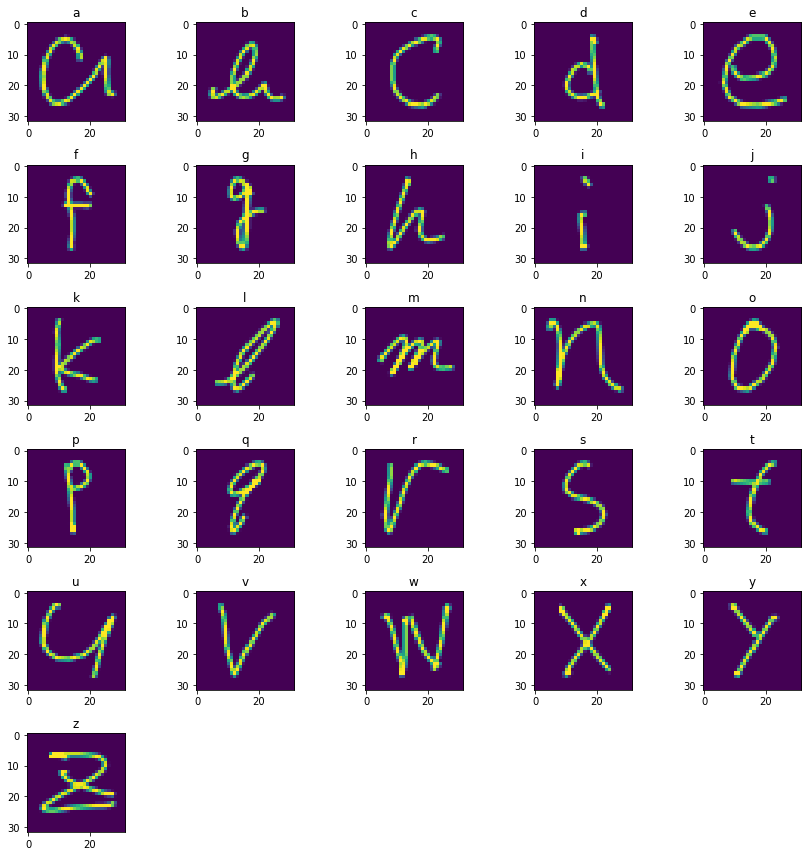

In [ ]:
n_target=max(y)+1
print('ターゲットの数:', n_target)
fig=plt.figure(figsize=(12, 12))
for i in range(n_target):
  ax=fig.add_subplot(6, 5, i+1)
  ax.imshow(X[y.tolist().index(i)].reshape(X.shape[1], X.shape[2]))
  ax.set_title(n2c[i])
plt.tight_layout()

In [ ]:
X/=255

In [ ]:
from keras import backend as K
img_rows, img_cols, img_channels=X.shape[1:]
if K.image_data_format()=='channnels_first':
  X=X.reshape(X.shape[0], img_channels, img_rows, img_cols)
  input_shape=(img_channels, img_rows, img_cols)
else:
  X=X.reshape(X.shape[0], img_rows, img_cols, img_channels)
  input_shape=(img_rows, img_cols, img_channels)

In [ ]:
from tensorflow.python import test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#Assignment

In [ ]:
batch_size=10
num_class=n_target
epochs=100

In [ ]:
#Assignment

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf

model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_class, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

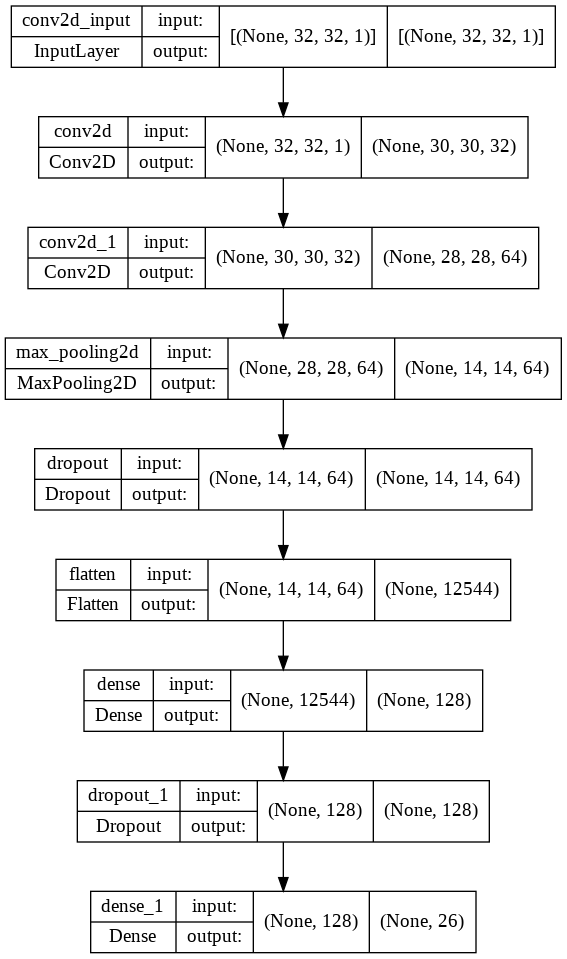

In [18]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [19]:
hist=model.fit(X_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(X_test, y_test))

Epoch 1/100
230/230 [==============================] - 11s 46ms/step - loss: 2.0639 - accuracy: 0.4135 - val_loss: 0.9536 - val_accuracy: 0.7823
Epoch 2/100
230/230 [==============================] - 10s 45ms/step - loss: 1.2562 - accuracy: 0.6291 - val_loss: 0.7257 - val_accuracy: 0.8266
Epoch 3/100
230/230 [==============================] - 10s 45ms/step - loss: 1.0049 - accuracy: 0.7091 - val_loss: 0.5966 - val_accuracy: 0.8501
Epoch 4/100
230/230 [==============================] - 11s 46ms/step - loss: 0.8369 - accuracy: 0.7509 - val_loss: 0.5167 - val_accuracy: 0.8774
Epoch 5/100
230/230 [==============================] - 11s 47ms/step - loss: 0.6987 - accuracy: 0.7913 - val_loss: 0.4782 - val_accuracy: 0.8683
Epoch 6/100
230/230 [==============================] - 10s 46ms/step - loss: 0.6142 - accuracy: 0.8287 - val_loss: 0.4238 - val_accuracy: 0.8918
Epoch 7/100
230/230 [==============================] - 11s 49ms/step - loss: 0.5212 - accuracy: 0.8509 - val_loss: 0.4002 - val_ac

In [20]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4212816059589386
Test accuracy: 0.9348109364509583


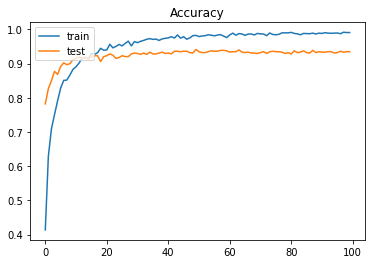

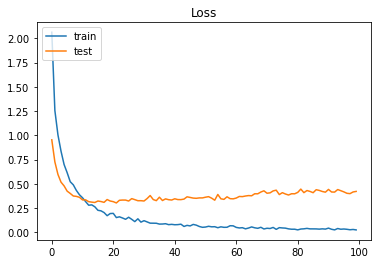

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

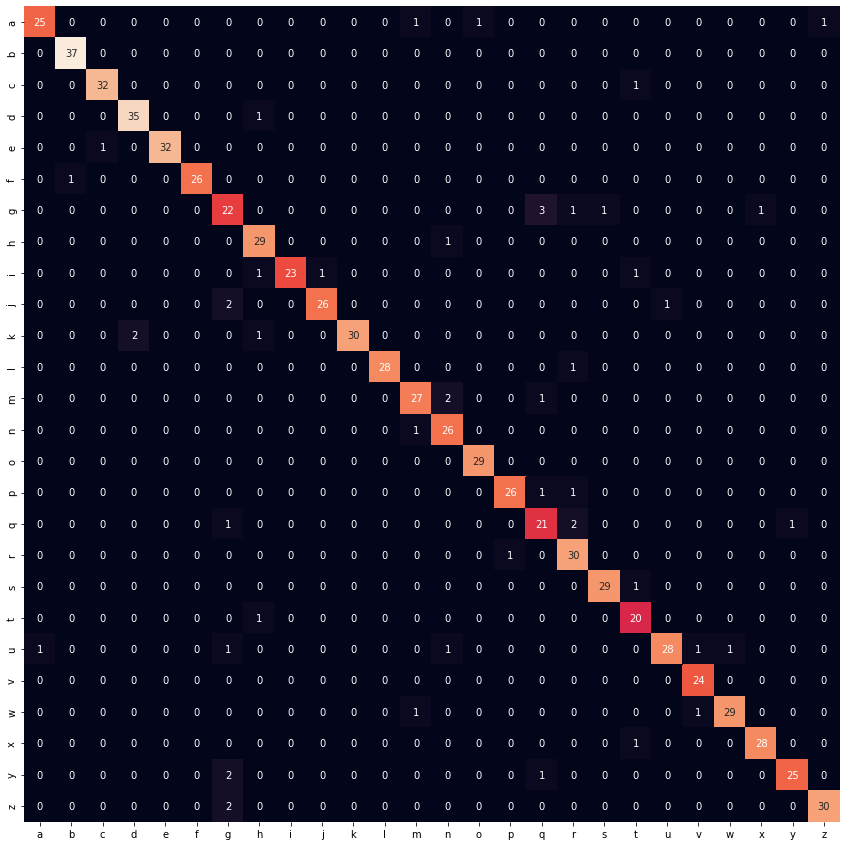

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted=np.argmax(model.predict(X_test), axis=1)
cmx=confusion_matrix(y_test, predicted)
df_cmx=pd.DataFrame(cmx, index=n2c.values(), columns=n2c.values())
plt.figure(figsize=(15, 15))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt='d')